<a href="https://colab.research.google.com/github/antonypaulson/Image_recognition_basics/blob/master/Image_Filtering_with_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Creating a filter to go through images
import scipy
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import numpy as np

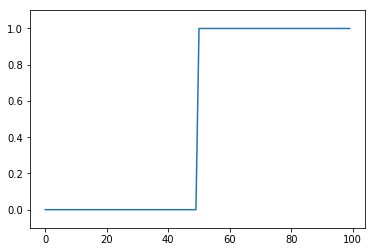

In [13]:
#Creating a basic step signal
step_signal = np.zeros(100)
step_signal[50:] = 1
fig, ax = plt.subplots()
ax.plot(step_signal);
ax.margins(y =0.1)

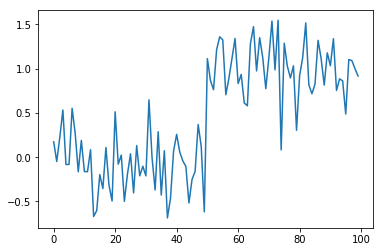

In [15]:
#Creating a noisy signal by adding noise to the step_signal
np.random.seed(42)

noisy_signal = (step_signal + np.random.normal(0,0.35, step_signal.shape))
fig, ax = plt.subplots()
ax.plot(noisy_signal);

In [24]:
#Smoothing it by using gaussian filter
kernel = np.full(11, 1/11)
from scipy.ndimage import convolve
mean_diff = np.convolve([1,0,-1], [1/3,1/3,1/3], mode = 'full')
print(mean_diff)

[ 0.33333333  0.33333333  0.         -0.33333333 -0.33333333]


In [27]:
#Creating the gaussian filter
first = -(np.arange(9) - 4)**2
second = np.exp(first/2)
third = 1/np.sqrt(2*np.pi)
k = third*second
k

array([1.33830226e-04, 4.43184841e-03, 5.39909665e-02, 2.41970725e-01,
       3.98942280e-01, 2.41970725e-01, 5.39909665e-02, 4.43184841e-03,
       1.33830226e-04])

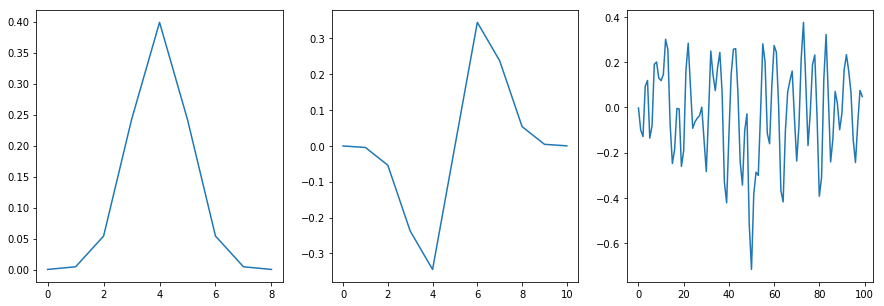

In [36]:
#Plotting filter
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(k)

#Convolving with difference smooth and plotting
smooth_diff = np.convolve(k, [-1,0, 1], mode = 'full')
ax[1].plot(smooth_diff)

#Convolve using smooth_diff
smooth_diff_signal = convolve(noisy_signal, smooth_diff)
ax[2].plot(smooth_diff_signal)

In [0]:
#filtering 2-D Images lets start with a square

import numpy as np

bright_square = np.zeros((7,7), dtype = float)
bright_square[2:5, 2:5 ] = 1

In [40]:
bright_square

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

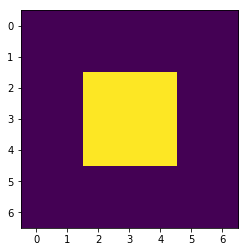

In [41]:
#showing an image of the created figure
fig, ax = plt.subplots()
ax.imshow(bright_square);

In [43]:
#Creating a mean kernel
mean_kernel = np.full((3,3), 1/9)
mean_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [44]:
#Running the filter over the bright square
import scipy.ndimage as ndi
print(bright_square)
print(ndi.convolve(bright_square, mean_kernel))

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.22222222 0.11111111
  0.        ]
 [0.         0.22222222 0.44444444 0.66666667 0.44444444 0.22222222
  0.        ]
 [0.         0.33333333 0.66666667 1.         0.66666667 0.33333333
  0.        ]
 [0.         0.22222222 0.44444444 0.66666667 0.44444444 0.22222222
  0.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.22222222 0.11111111
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


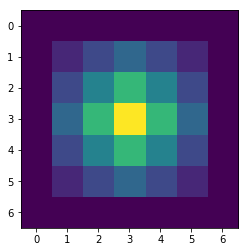

In [45]:
plt.imshow(ndi.convolve(bright_square, mean_kernel))

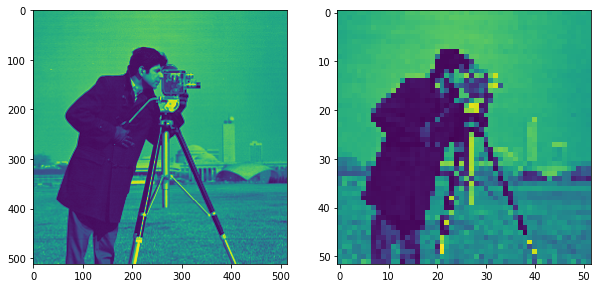

In [46]:
#Visualizing how this works on real images

from skimage import data
image = data.camera()
pixelated = image[::10, ::10]
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (10,5))
ax0.imshow(image)
ax1.imshow(pixelated)

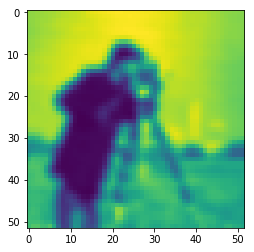

In [53]:
from skimage import filters, img_as_float
smooth_mean = ndi.convolve(image, mean_kernel)
pixelated_float = img_as_float(pixelated)
sigma  =1
smooth = filters.gaussian(pixelated_float, sigma)
plt.imshow(smooth);

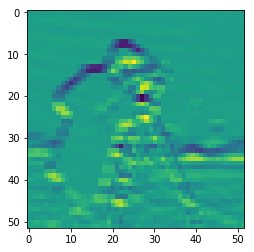

In [54]:
#Applying the difference filter in 2D basically vertical gradient
vertical_kernel = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

gradient_vertical = ndi.convolve(pixelated.astype(float),
                                vertical_kernel)
plt.imshow(gradient_vertical)

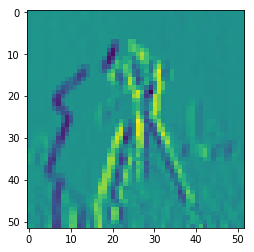

In [55]:
horizontal_kernel = vertical_kernel.T
horizontal_gradient = convolve(pixelated.astype(float),
                              horizontal_kernel)
fig,ax = plt.subplots()
ax.imshow(horizontal_gradient)

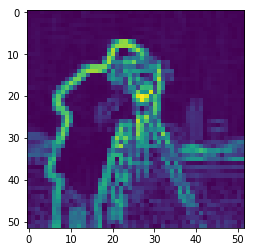

In [56]:
#Edge Filtering
gradient = np.sqrt((horizontal_gradient**2) + (gradient_vertical**2))
plt.imshow(gradient)

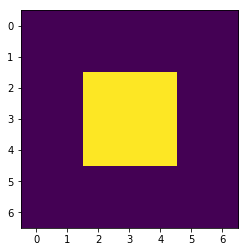

In [57]:
plt.imshow(bright_square)

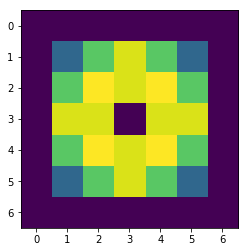

In [59]:
plt.imshow(filters.sobel(bright_square))

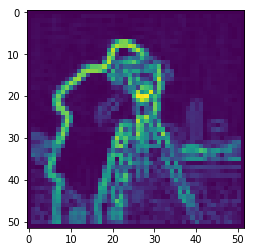

In [63]:
plt.imshow(filters.sobel(pixelated_float))

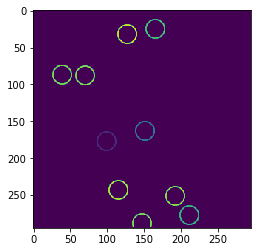

In [70]:
from skimage import io, color
img = img_as_float(io.imread('ex0.png'))
gray_image = color.rgb2gray(img)
plt.imshow(filters.sobel(gray_image))